# Correlation analysis in Python

**Мета:** продемонструвати свої навички кореляційного аналізу даних, використовуючи заданий набір даних
та вказані інструменти

**Передумови / сценарій** <br/>
У цій лабораторній роботі ви дізнаєтесь, як використовувати Python для обчислення кореляції. У частині 1
ви налаштуєте набір даних. У частині 2 ви дізнаєтеся, як визначити, чи змінні в даному наборі даних є
корельованими. У частині 3 ви будете використовувати Python для обчислення кореляції між двома
наборами змінних. Нарешті, у частині 4 ви здійсните візуалізацію результатів дослідження.

## Частина 1: Набір даних

Використано набір даних, який містить зразок 40 студентів у Southwestern university. Було взято
чотири субтести (словниковий запас, схожість, дизайн блоків та доповнення картинок) переглянутої
Wechsler Adult Intelligence Scale (1981). Дослідники використовували магнітно-резонансну томографію (МРТ) для визначення розміру мозку досліджуваних. Також включена інформація про стать та розмір тіла (зріст та вага).

**Крок 1: Завантаження набору даних із файлу**

In [1]:
import pandas as pd
brainFile = './Data/brainsize.txt'
brainFrame = pd.read_csv(brainFile)

**Крок 2: Перевірка дата фрейму**

In [2]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Частина 2: Діаграми розсіювання та корельовані змінні

**Крок 1: Метод describe()** <br/>
Виведення результатів методу describe(), обчислені по відношенню до дата
фрейму brainFrame.

In [3]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**Крок 2: Графіки діаграм розсіювання** <br/>
У цій лабораторній роботі використовується коефіцієнт кореляції Пірсона, який чутливий лише до
лінійного співвідношення між двома змінними

**Завантаження необхідних модулів**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

**Відокремлення даних** <br/>
Створення двої нових кадрів даних, menDf і womenDf, один, що містить усі записи чоловіків, а інший - лише жіночі випадки.

In [5]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

**Побудова графіків** <br/>
Обчислення середнього значення показників інтелекту чоловіків та збереження
результату у змінній menMeanSmarts. Створення діаграми розсіювання між
menMeanSmarts змінною та MRI_Count атрибутом. Відображення графіку.

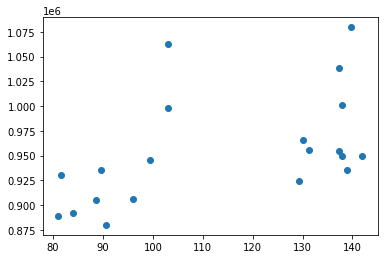

In [6]:
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Створення графіку розбіжності для відфільтрованого кадру даних лише для жінок

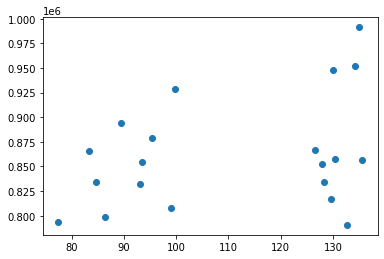

In [7]:
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

## Частина 3: Обчислення кореляції в Python

**Крок 1: Обчисліть співвідношення між brainFrame** <br/>
Отримання кореляції між усіма змінними одночасно

In [8]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Діагональ зліва направо у таблиці кореляцій заповнена одиницями, оскільки відображає зв'язок між однаковими змінними. Також значення відображаються дзеркально: значення нижче 1 діагоналі мають дзеркальний аналог вище 1 діагоналі, оскільки відображається зв'язок між одними й тими ж самими змінними тільки в іншому порядку.

Розрахунок кореляції змінних, що містяться в кадрі даних лише
для жінок

In [9]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


Розрахунок для кадру даних, призначеного лише для чоловіків:

In [10]:
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Частина 4: Візуалізація

**Крок 1: Встановлення Seaborn**

In [11]:
!pip install seaborn

**Крок 2: Побудова графіку кореляційної теплової карти**

Для кадру даних жінок

<AxesSubplot:>

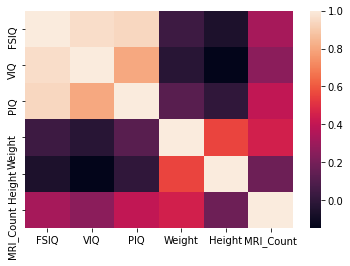

In [12]:
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Для кадру даних чоловіків

<AxesSubplot:>

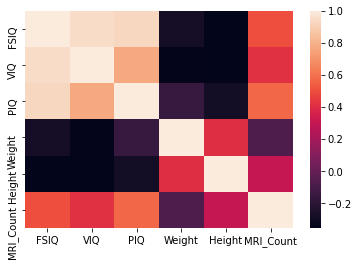

In [13]:
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Багато пар змінних мають кореляцію, близьку до нуля, це означає що між ними існує слабкий зв'язок. Розділення статі проводиться для того щоб результати визначення кореляції не спотворювались через різницю в чоловічому та жіночому тілах. Найсильнішу кореляцію з розміром мозку (MRI_Count) мають показники інтелекту (PIQ, FSIQ та VIQ), що підтверджується графіками.

<p style="text-align: center;"><b>Висновки</b></p>

В ході виконанні лабораторної роботи було здобуто навички кореляційного аналізу даних за допомогою Python та здійснено візуалізацію результатів дослідження.